In [1]:
# Part 1 – Object Oriented programming 
# this is the base class for all types of neurons, representing a basic neuron
class GeneralNeuron:
    def __init__(self, firing_rate):
        self.firing_rate = firing_rate
# to activate the neuron when stimuls is recived 
    def activate(self,stimulus):
        pass


# This class inherites from GeneralNeuron, represents a sensory neuron 
class SensoryNeuron(GeneralNeuron):
    def __init__(self,firing_rate,receptor_type):
        super().__init__(firing_rate)
        self.receptor_type = receptor_type
# placeholder for sensing a stimulus, using the inherited activation method
    def sense_stimulus(self, stimulus):
        super().Activate(stimulus)
        pass

# This class represents a motor neuron, which is responsible for controlling muscles
class MotorNeuron (GeneralNeuron):
    def __init__(self,firing_rate,target_muscle):
        super().__init__(firing_rate)
        self.target_muscle = target_muscle
# placeholder for controlling a muscle based on a stimulus
    def ControlMuscle(self,stimulus):
        pass 

# class that represents a photoreceptor, a type of sensory neuron that detects light.
class Photoreceptor(SensoryNeuron):
    def __init__(self, firing_rate):
        super.__init__(firing_rate, receptor_type = "light")
# placeholder for detecting light
    def LightDetection (self, stimulus):
        pass

# class represents a mechanoreceptor, a type of sensory neuron that detects pressure
class Mechanoreceptor(SensoryNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate,receptor_type = "pressure")
# placeholder for detecting pressure
    def PressureDetection (self, stimulus):
        pass

# This class represents an alpha motor neuron, which controls skeletal muscles
class AlphaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate):
        super.__init__(firing_rate, target_muscle = "skeletal muscle" )
# placeholder for controlling skeletal muscles   
    def skeletal_muscle_control(self):
        pass

#This class represents a gamma motor neuron, which controls muscle spindles
class GammaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate,target_muscle= "muscle spindle")
# placeholder for controlling muscle spindles
    def muscle_spindle_control(self):
        pass

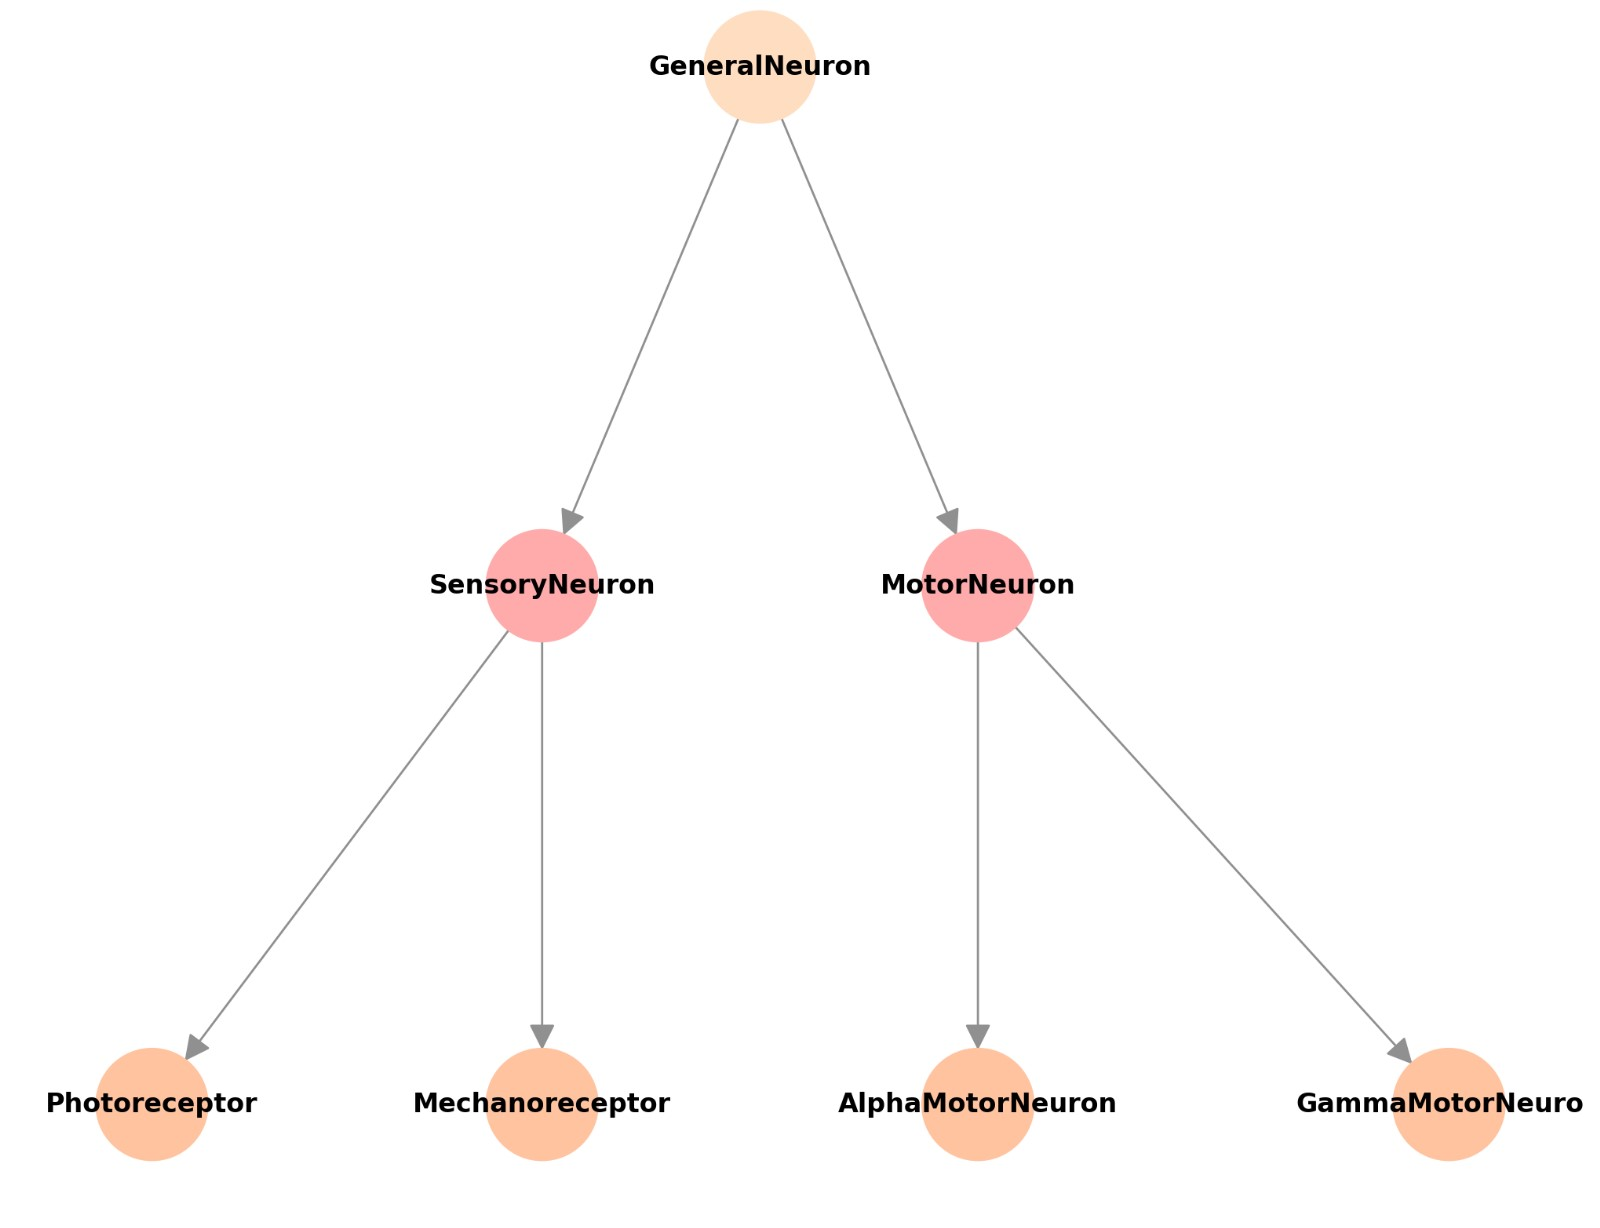

In [4]:
from IPython.display import Image, display

display(Image("GeneralNeuron.jpg"))


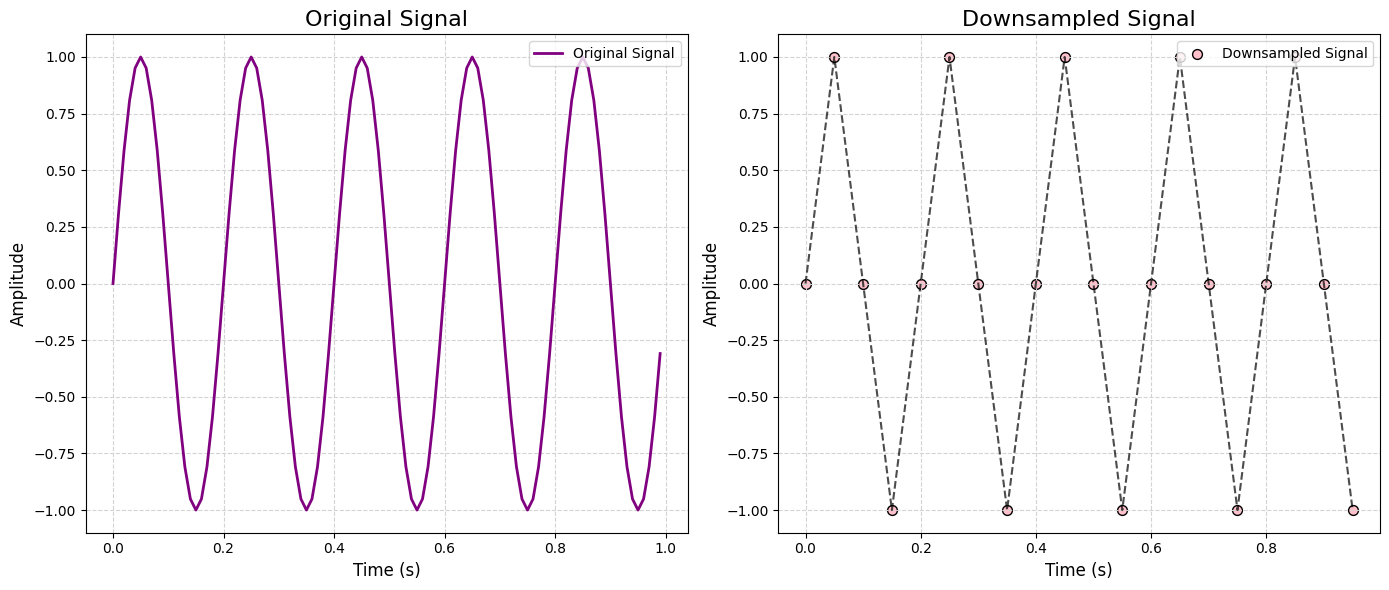

In [5]:
# part 2, question 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# define the time array and create a sinusodial signal, Create time points from 0 to 1 with a step of 0.01 seconds 
# and signal with frequency 5Hz
time = np.arange(0, 1, 0.01)
signal = np.sin(2 * np.pi * 5 * time)

# Find maxima and minima in the signal
m1 = [i for i in range(1, len(signal) - 1) if signal[i] > signal[i - 1] and signal[i] > signal[i + 1]]
m2 = [i for i in range(1, len(signal) - 1) if signal[i] < signal[i - 1] and signal[i] < signal[i + 1]]
maxima = np.array(m1)
minima = np.array(m2)

# Downsample the signal by selecting every 5th point and preserving extrema
step = 5
downsampled_indices = [i for i in range(0, len(signal), step)]
key_indices = sorted(set(downsampled_indices + maxima.tolist() + minima.tolist()))
downsampled_signal = [signal[i] for i in key_indices]
downsampled_time = [time[i] for i in key_indices]

# creates a plot of the original sinusoidal signal.
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1) 
plt.plot(time, signal, label="Original Signal", color='purple', linewidth=2)
plt.title("Original Signal", fontsize=16)
plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid(color='lightgray', linestyle='--', linewidth=0.8)
plt.legend(fontsize=10, loc='upper right')

# create a plot of the downsampled signal
plt.subplot(1, 2, 2) 
plt.scatter(downsampled_time, downsampled_signal, color='pink', label="Downsampled Signal", edgecolor='black', s=50)
plt.plot(downsampled_time, downsampled_signal, color='black', linestyle='--', alpha=0.7)
plt.title("Downsampled Signal", fontsize=16)
plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid(color='lightgray', linestyle='--', linewidth=0.8)
plt.legend(fontsize=10, loc='upper right')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


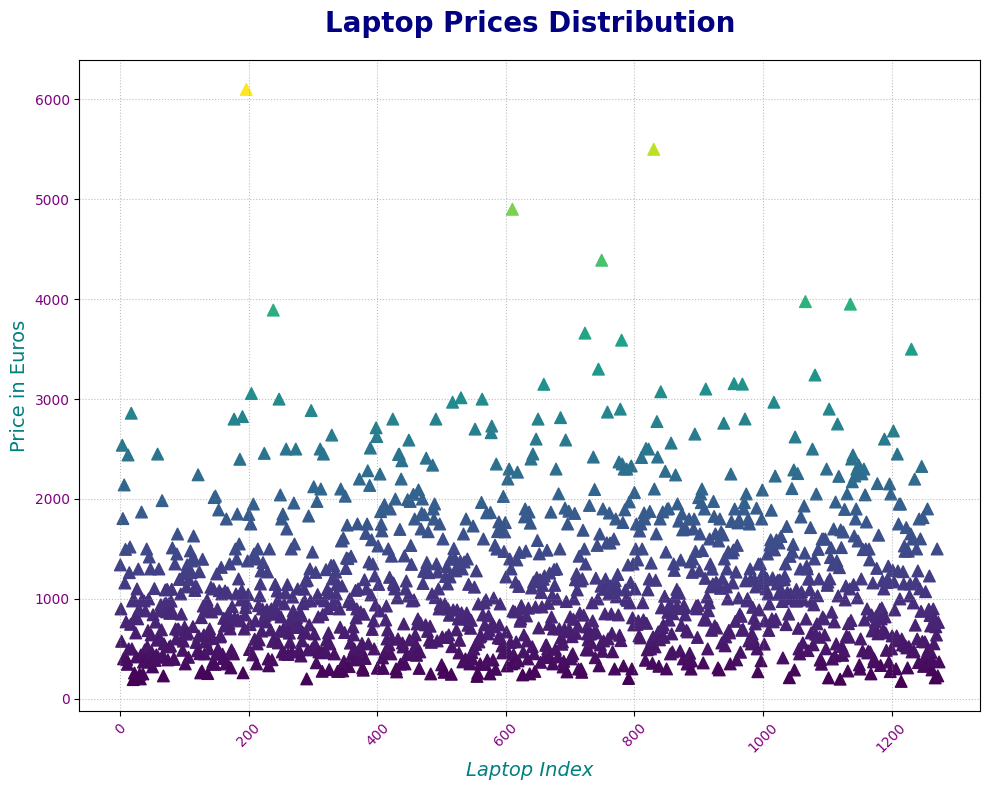

In [6]:
# part 2, question 2-1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load the dataset into pandas DataFrame
dataset = pd.read_csv('laptop_price - dataset.csv')      





# plot the price of all the laptops 
plt.figure(figsize=(10, 8)) 
scatter = plt.scatter(
    x=dataset.index, y=dataset['Price (Euro)'], c=dataset['Price (Euro)'], s=70, marker='^'
)
# create a plot for laptop price
plt.title("Laptop Prices Distribution", fontsize=20, fontweight='bold', color='navy', pad=20)
plt.xlabel("Laptop Index", fontsize=14, fontstyle='italic', color='teal')
plt.ylabel("Price in Euros", fontsize=14, color='teal')
plt.grid(color='gray', linestyle=':', alpha=0.5)  
plt.xticks(fontsize=10, rotation=45, color='purple')
plt.yticks(fontsize=10, color='purple')
plt.tight_layout()
plt.show()

In [7]:
## part 2, question 2-2
# Calculate the average laptop price for each company, and find the company with the highest average price 
avg = dataset.groupby('Company')['Price (Euro)'].mean().sort_values(ascending=False)
for company, price in avg.items():
    print(f"{company}: {price:.5f} Euros")
exp_company = avg.index[0]
exp_company_price = avg.iloc[0]
print("\nCompany with the Most Expensive Laptops on Average")
print(f"{exp_company} - Average Price: €{exp_company_price:.5f}\n")


Razer: 3346.14286 Euros
LG: 2099.00000 Euros
MSI: 1728.90815 Euros
Google: 1677.66667 Euros
Microsoft: 1612.30833 Euros
Apple: 1564.19857 Euros
Huawei: 1424.00000 Euros
Samsung: 1413.44444 Euros
Toshiba: 1267.81250 Euros
Dell: 1199.22512 Euros
Xiaomi: 1133.46250 Euros
Asus: 1123.82974 Euros
Lenovo: 1093.86221 Euros
HP: 1080.31466 Euros
Fujitsu: 729.00000 Euros
Acer: 633.46446 Euros
Chuwi: 314.29667 Euros
Mediacom: 295.00000 Euros
Vero: 217.42500 Euros

Company with the Most Expensive Laptops on Average
Razer - Average Price: €3346.14286



In [8]:
## part 2, question 2-3
# Define a function to unify operating system names, and standardize Mac OS X" as "macOS" and all Windows versions as "Windows"
def unify_os(os):
    if os == 'Mac OS X':
        return 'macOS'
    elif os in ['Windows 7', 'Windows 10 S', 'Windows 10']:
        return 'Windows'
    else:
        return os 
dataset['OpSys'] = dataset['OpSys'].apply(unify_os)
print("Unique Operating Systems:")
OpSysNames = dataset['OpSys'].unique()
print(OpSysNames)

Unique Operating Systems:
['macOS' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']


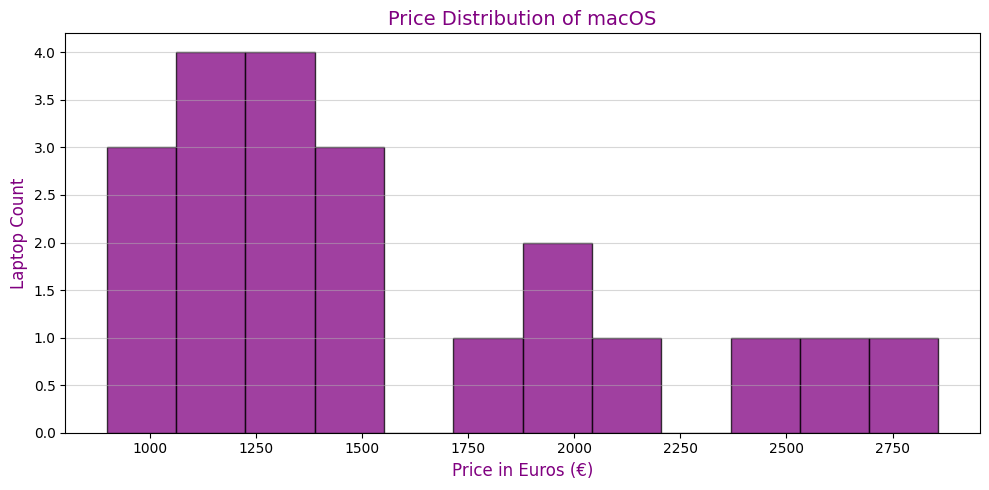

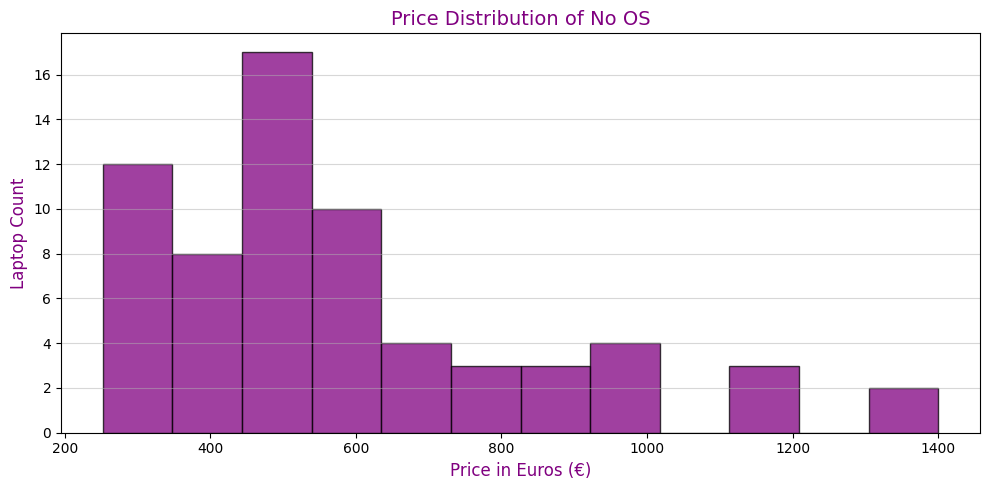

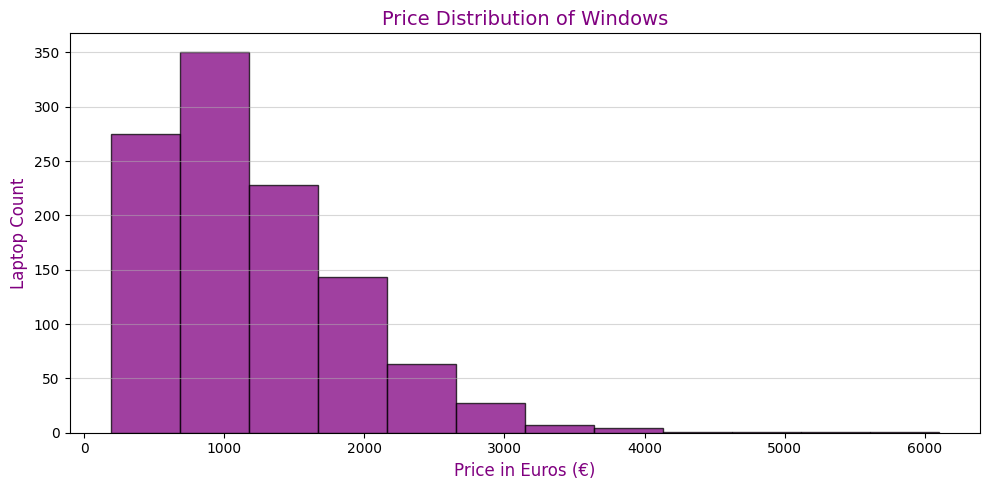

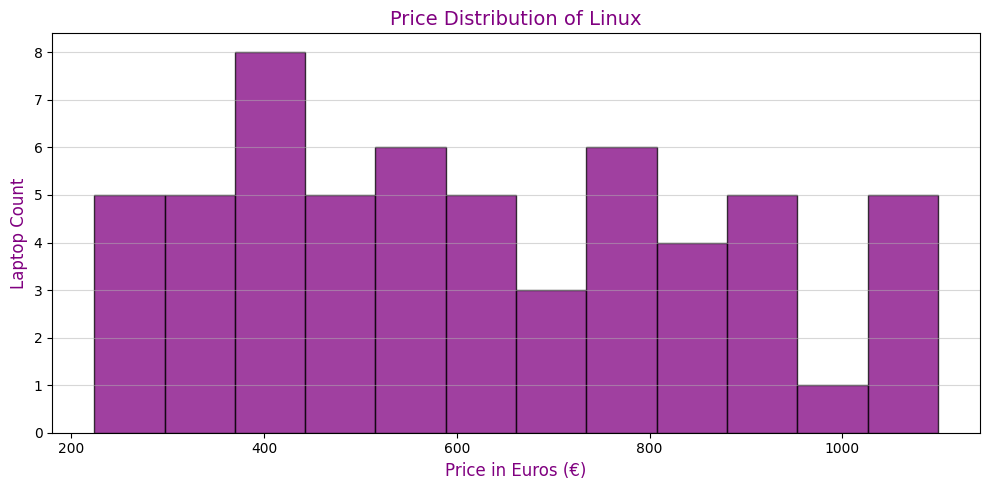

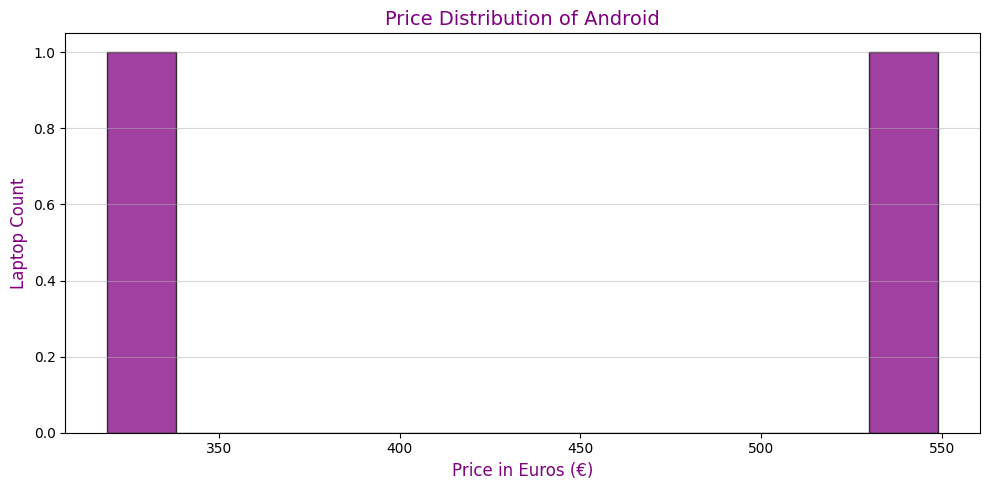

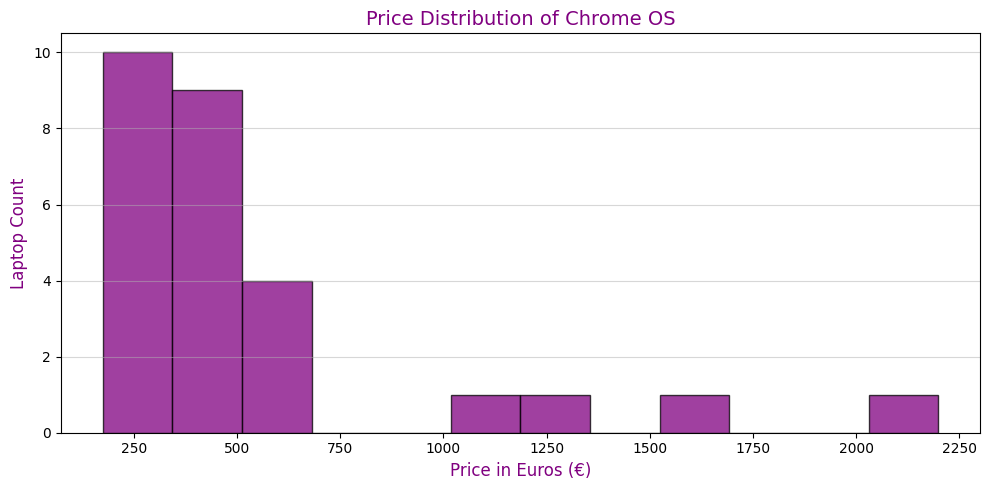

In [9]:
# part 2, question 2-4
# Plot the price distribution for each operating system type, and create a histtogram for the price distribution 
index = 0
while index < len(OpSysNames):
    current = OpSysNames[index]
    prices = dataset.loc[dataset['OpSys'] == current, 'Price (Euro)']
    plt.figure(figsize=(10, 5))
    plt.hist(
        prices, bins=12, color='purple', alpha=0.75, edgecolor='black'
    )
    plt.title(f"Price Distribution of {current}", fontsize=14, color='purple')
    plt.xlabel("Price in Euros (€)", fontsize=12, color='purple')
    plt.ylabel("Laptop Count", fontsize=12, color='purple')
    plt.grid(axis='y', alpha=0.5)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()
    index += 1

C:\Users\Win10\AppData\Local\Temp\ipykernel_22048\333608364.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon=True, loc="upper left")


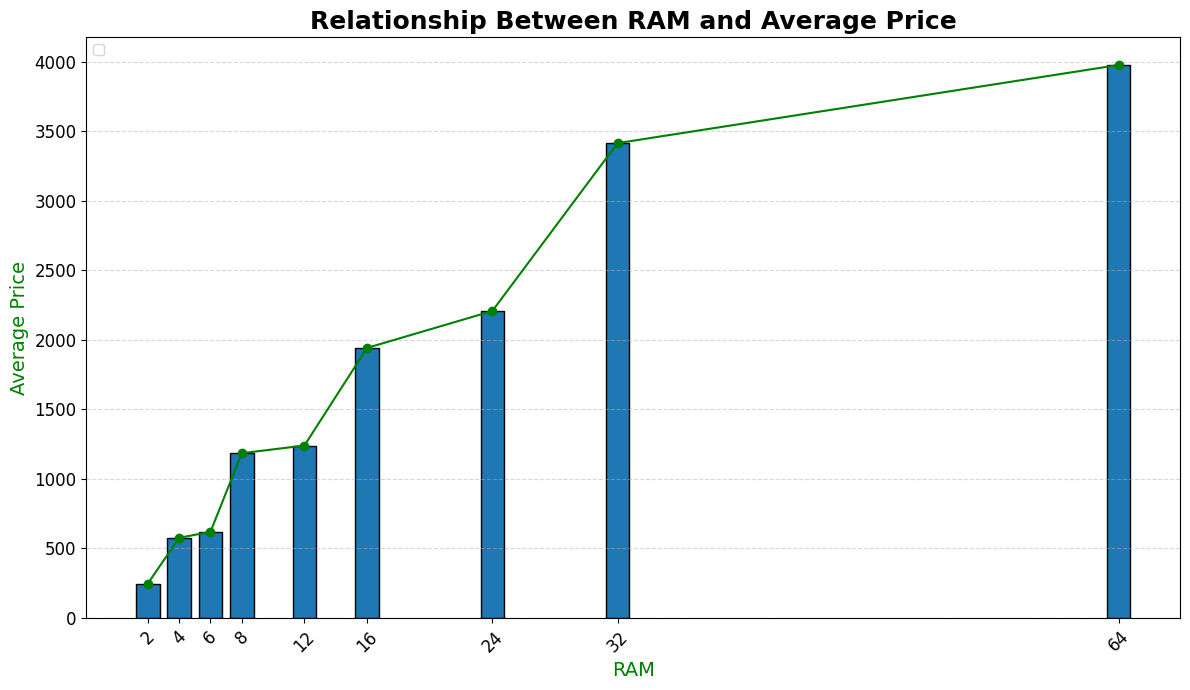

In [10]:
# part 2, question 2-5
# Analyze the relationship between RAM and laptop price, and create a bar chart 
avg1 = dataset.groupby('RAM (GB)', as_index=False)['Price (Euro)'].mean()
sizes = avg1['RAM (GB)']
avg2 = avg1['Price (Euro)']
plt.figure(figsize=(12, 7))
bars = plt.bar(sizes, avg2, edgecolor='black', width=1.5)
plt.plot(sizes, avg2, color='green', marker='o')
plt.title("Relationship Between RAM and Average Price", fontsize=18, fontweight='bold')
plt.xlabel("RAM", fontsize=14, color='green')
plt.ylabel("Average Price", fontsize=14, color='green')
plt.xticks(sizes, fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(frameon=True, loc="upper left")
plt.tight_layout()
plt.show()

In [11]:
# part 2, question 2-6
# Create a new column "Storage type" that extracts the storage type from the "Memory" column
def help_func(mem):
    if "+" in mem:
        parts = mem.split(" + ")
        types = []
        for part in parts:
            storage_type = " ".join(part.split()[1:])
            if storage_type not in types: 
                types.append(storage_type)
        return "  ".join(types) 
    else:
        return " ".join(mem.split()[1:])
dataset["Storage type"] = dataset["Memory"].apply(help_func)
print(dataset[['Memory', 'Storage type']].head())

                Memory   Storage type
0            128GB SSD            SSD
1  128GB Flash Storage  Flash Storage
2            256GB SSD            SSD
3            512GB SSD            SSD
4            256GB SSD            SSD
